In [14]:
#Importing required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [15]:
#Loading Data
df = pd.read_csv('data.csv')
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


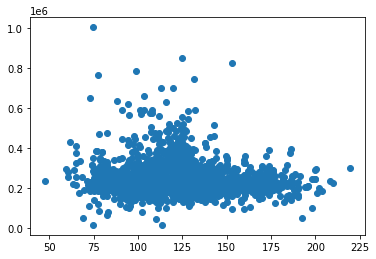

In [16]:
plt.scatter(df['tempo'], df['duration_ms'])

In [159]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [160]:
y_pred = km.fit_predict(df[['tempo','duration_ms']])
y_pred

array([0, 2, 0, ..., 0, 0, 0])

In [161]:
df['cluster'] = y_pred
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,cluster
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,2
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,1


No handles with labels found to put in legend.


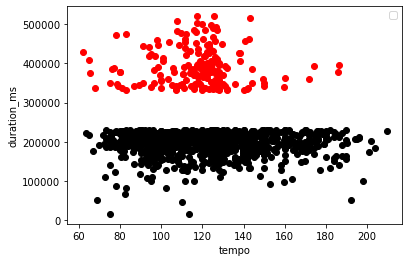

In [162]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.tempo, df1['duration_ms'], color = 'black')
plt.scatter(df2.tempo, df2['duration_ms'], color = 'red')
plt.xlabel('tempo')
plt.ylabel('duration_ms')
plt.legend()

In [163]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['tempo','duration_ms']])
    sse.append(km.inertia_)
sse

[13549573446728.303,
 5948576043615.994,
 3408724955989.357,
 2172148361666.9219,
 1454646395022.8887,
 1104767535434.2507,
 835993596024.9612,
 653159943023.1656,
 512246336288.5788]

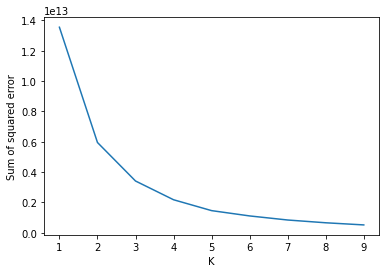

In [164]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)